ETL PROCESS


In [2]:
import pandas as pd

def extract_data(file_path, delimiter=","):
    
    try:
        df = pd.read_csv(file_path, sep=delimiter, low_memory=False)
        print(f"Successfully loaded data from {file_path}")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None


In [3]:
share_prices = extract_data("/Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-shareprices-daily.csv", delimiter=";")
companies = extract_data('/Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-companies.csv', delimiter=";")
cashflow = extract_data('/Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-cashflow-banks-quarterly.csv', delimiter=";")
income_statement = extract_data('/Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-income-banks-quarterly.csv', delimiter=";")
balance_sheet = extract_data('/Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-balance-banks-quarterly.csv', delimiter=";")


Successfully loaded data from /Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-shareprices-daily.csv
Successfully loaded data from /Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-companies.csv
Successfully loaded data from /Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-cashflow-banks-quarterly.csv
Successfully loaded data from /Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-income-banks-quarterly.csv
Successfully loaded data from /Users/YOLO/Desktop/Term 2/Python2/Python Group/Datasets/de-balance-banks-quarterly.csv


In [4]:
companies.head()

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,1COV.DE,854465,Covestro,110001,DE0006062144,12,15649.0,Covestro AG is a German company which produces...,de,NaN,USD
1,ADS.DE,847329,adidas Group,103002,DE000A1EWWW0,12,57016.0,"Adidas AG is a multinational corporation, foun...",de,NaN,USD
2,ALV.DE,849433,Allianz SE,104005,DE0008404005,12,159253.0,"Allianz SE, together with its subsidiaries, pr...",de,NaN,USD
3,BAS.DE,854462,BASF,110001,DE000BASF111,12,122404.0,BASF SE operates as a chemical company worldwi...,de,NaN,USD
4,BAYN.DE,849702,Bayer,106005,DE000BAY0017,12,110838.0,"Bayer Aktiengesellschaft, together its subsidi...",de,NaN,USD


In [7]:
share_prices.loc[share_prices["Ticker"] == "VOW.DE"]

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
37875,VOW.DE,858327,2019-04-03,170.14,173.52,169.81,171.49,113.34,85627,NaN,501300000.0
37876,VOW.DE,858327,2019-04-04,170.60,174.30,170.09,173.46,114.64,88017,NaN,501300000.0
37877,VOW.DE,858327,2019-04-05,173.82,174.33,171.86,171.91,113.62,73977,NaN,501300000.0
37878,VOW.DE,858327,2019-04-08,170.53,173.74,170.53,173.74,114.82,55935,NaN,501300000.0
37879,VOW.DE,858327,2019-04-09,173.66,175.35,170.45,171.52,113.35,76803,NaN,501300000.0
...,...,...,...,...,...,...,...,...,...,...,...
39124,VOW.DE,858327,2024-02-29,157.38,158.79,156.73,157.38,147.20,141450,NaN,501295263.0
39125,VOW.DE,858327,2024-03-01,158.24,159.97,144.40,151.32,141.52,113427,NaN,501295263.0
39126,VOW.DE,858327,2024-03-04,151.77,155.35,151.72,154.65,144.63,55049,NaN,501295263.0
39127,VOW.DE,858327,2024-03-05,153.38,153.49,148.23,150.56,140.81,53480,NaN,501295263.0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller


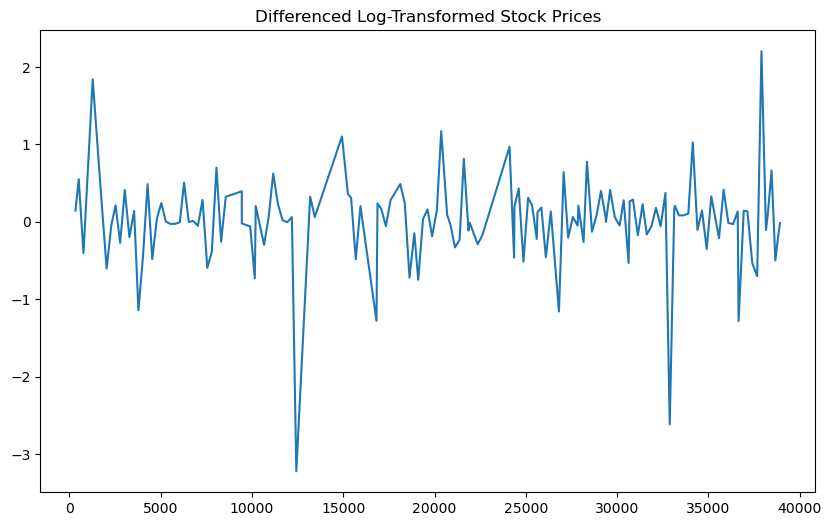

ADF Statistic: -7.238666193855375
p-value: 1.9096945262588518e-10


In [11]:
# Log transformation to stabilize variance
share_prices['Log_Close'] = np.log(share_prices['Close'])

# First differencing to remove trend (stationarity)
share_prices['Log_Close_diff'] = share_prices['Log_Close'] - share_prices['Log_Close'].shift(1)

# Drop missing values (due to differencing)
share_prices.dropna(inplace=True)

# Plot the transformed data
plt.figure(figsize=(10, 6))
plt.plot(share_prices['Log_Close_diff'])
plt.title('Differenced Log-Transformed Stock Prices')
plt.show()

# Stationarity Test: Augmented Dickey-Fuller Test
result = adfuller(share_prices['Log_Close_diff'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

